#**Heart Disease Prediction Using KNN, Decision Tree, and Random Forest Classifier**

#Dataset
Used the Kaggle dataset that could befound through this link: https://www.kaggle.com/ronitf/heart-disease-uci

#Importing the libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import RcParams
from matplotlib.cm import rainbow

#Loading the data

In [289]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [290]:
X = data.drop(columns= ['target'])
y = data['target']

#Initial Analysis

In [291]:
#data.info()

In [292]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Feature selection

##Calculating the correlation with a heatmap

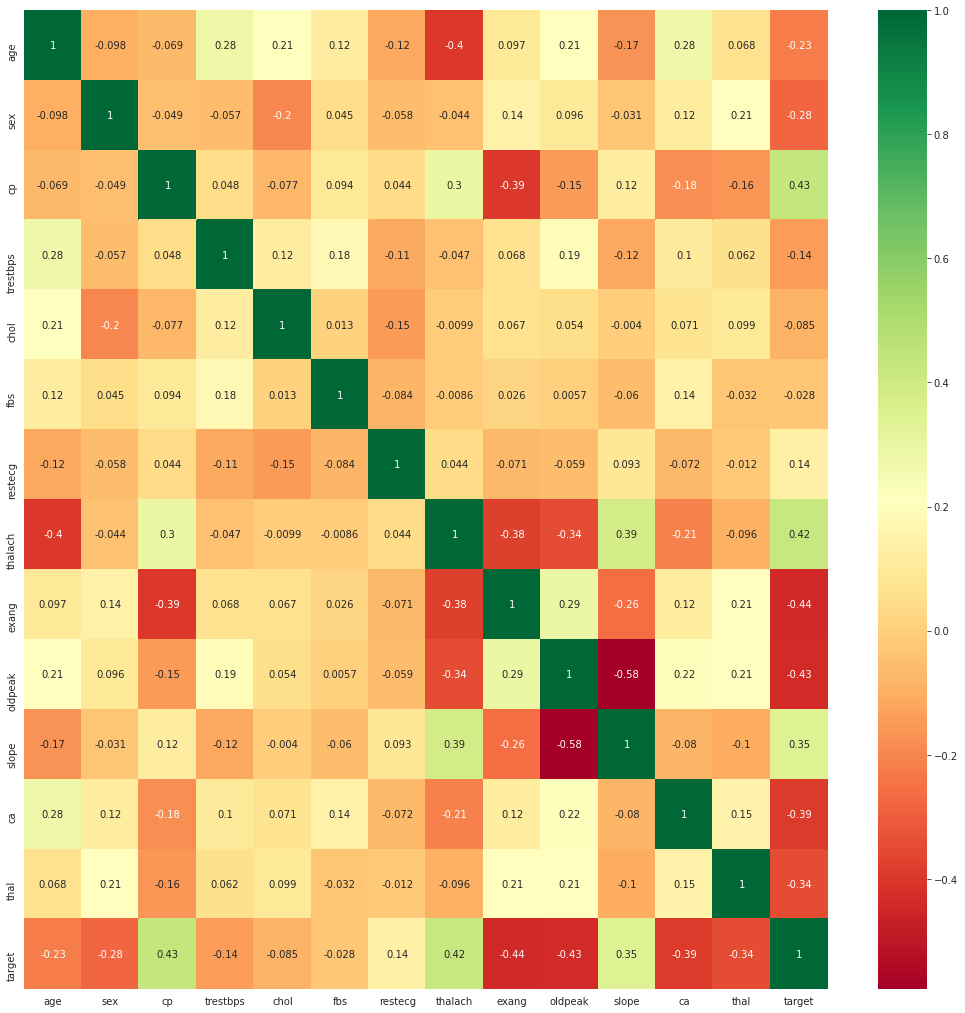

In [293]:
import seaborn as sns
correlation = data.corr()
corr_features = correlation.index
plt.figure(figsize=(18,18))
c = sns.heatmap(data[corr_features].corr(), annot=True, cmap = 'RdYlGn')

In [294]:
#data.hist(figsize=(15,15))

##Check if the dataset is well balanced

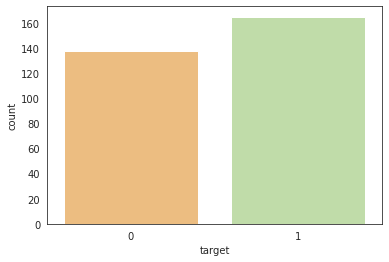

In [295]:
sns.set_style('white')
sns.countplot(x = 'target', data = data, palette= 'Spectral')
#Looks like a balanced dataset

#Dummy Variables

In [296]:
X = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
X.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


#Splitting the dataset

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

#Data Scaling

In [298]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[scale] = sc.fit_transform(X_train[scale])
X_test[scale] = sc.transform(X_test[scale])

In [299]:
#X_train

#KNN model

##Applying the model on the train set

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores = []
for k in range (1,10):
  knn = KNeighborsClassifier(n_neighbors = k)
  val_score = cross_val_score(knn, X_train, y_train, cv = 10)
  scores.append(val_score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

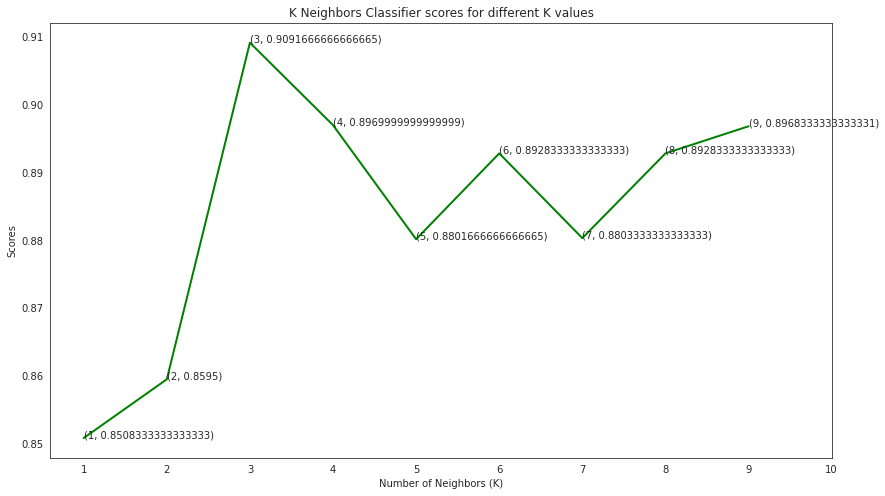

In [301]:
plt.figure(figsize = (14,8))
plt.plot([k for k in range(1, 10)], scores, color = 'green', linewidth = 2)
for i in range(1,10):
    plt.text(i, scores[i-1], (i, scores[i-1]))

plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [302]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##Predicting the result

In [303]:
y_pred = knn.predict(X_test)

##Confusion matrix

In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  2]
 [ 4 30]]


##Accuracy score

In [305]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9016393442622951


#Decision Tree

##Applying the model on the training set

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 1)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

##Predicting the test set

In [307]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

##Confusion Matrix and Accuracy score

In [308]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", cm, '\n')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score", accuracy)

Confusion Matrix 
 [[27  0]
 [ 0 34]] 

Accuracy score 1.0


#Random Forest Classifier

##Applying the model on the training set

In [309]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

##Predicting the test set

In [310]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

##Confusion Matrix and Accuracy score

In [311]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", cm, '\n')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score", accuracy)

Confusion Matrix 
 [[27  0]
 [ 1 33]] 

Accuracy score 0.9836065573770492
